In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
train_dir = '/content/drive/MyDrive/Indian currency/train'
val_dir   = '/content/drive/MyDrive/Indian currency/valid'
test_dir  = '/content/drive/MyDrive/Indian currency/test'

In [ ]:
img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=img_size, batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=img_size, batch_size=batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=img_size, batch_size=batch_size
)
class_names = train_ds.class_names
print("Classes:", class_names)


Found 672 files belonging to 6 classes.
Found 126 files belonging to 6 classes.
Found 44 files belonging to 6 classes.
Classes: ['10', '100', '20', '200', '50', '500']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')   # 6 classes: 10,20,50,100,200,500
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.1317 - loss: 2.0111 - val_accuracy: 0.2143 - val_loss: 1.7893
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2268 - loss: 1.7790 - val_accuracy: 0.2698 - val_loss: 1.7730
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3122 - loss: 1.7235 - val_accuracy: 0.3333 - val_loss: 1.7055
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4032 - loss: 1.5548 - val_accuracy: 0.3571 - val_loss: 1.5313
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5653 - loss: 1.2263 - val_accuracy: 0.5794 - val_loss: 1.2756
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6971 - loss: 0.8824 - val_accuracy: 0.6111 - val_loss: 1.0694
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7307 - loss: 0.7243 - val_accuracy: 0.6349 - val_loss: 1.0344
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7843 - loss: 0.5956 - val_accuracy: 0.6984 - val_loss

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7652 - loss: 0.9512
Test Accuracy: 77.27%


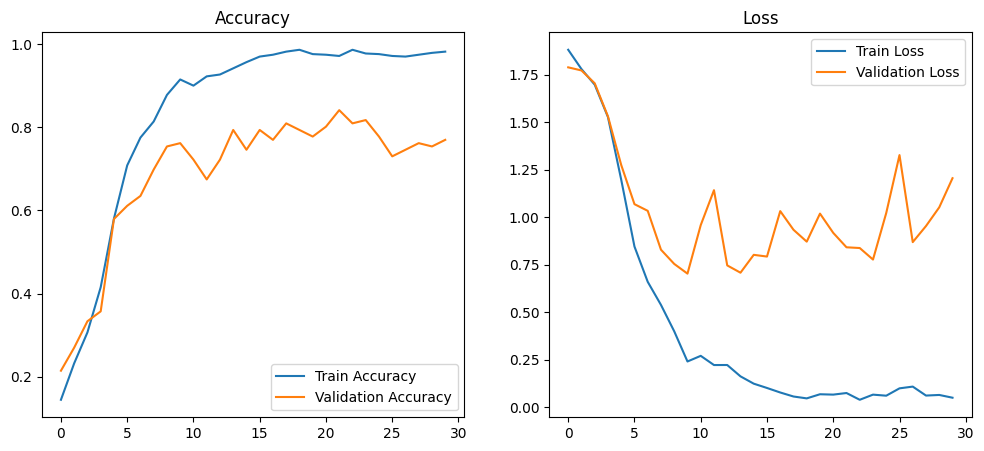

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Indian currency/test/100/IMG_20250123_115629_074_jpg.rf.f4a88babb232a83b2dff30aa39b99df7.jpg'  # ← change to your test image path
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
print(f"Predicted denomination: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted denomination: 100


Please upload an image of Indian currency note for prediction:


Saving IMG_20250123_123653_002_jpg.rf.78125028bb3ba8356e987bea48d8a11e.jpg to IMG_20250123_123653_002_jpg.rf.78125028bb3ba8356e987bea48d8a11e.jpg

Uploaded image: IMG_20250123_123653_002_jpg.rf.78125028bb3ba8356e987bea48d8a11e.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


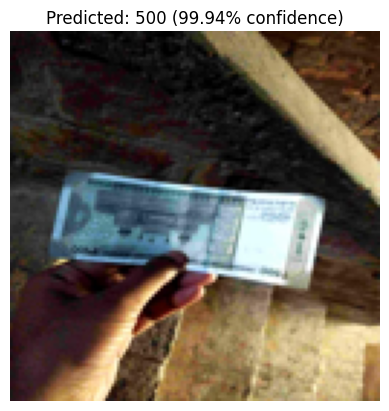

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
print("Please upload an image of Indian currency note for prediction:")
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"\nUploaded image: {filename}")
    img_path = filename
    img = Image.open(img_path).convert("RGB")
    img = img.resize((128, 128))
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}% confidence)")
    plt.show()